In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from BaseModel import BinaryClassifier
from ConfigModel import *
import seaborn as sns
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns


DEVICE: cuda


c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

data = pd.read_csv("Performance.csv")
loss_train = data['Loss Train']
loss_test = data['Loss Test']
accuracy = data['Accuracy']
precision = data['Precision']
recall = data['Recall']
data.head()

,Loss Train,Loss Test,Accuracy,Precision,Recall
0,8.416725,2.129633,0.553957,0.754353,0.553957
1,3.329994,2.231135,0.553957,0.754353,0.553957
2,1.430900,1.600881,0.424460,0.288780,0.424460
3,1.196858,0.939845,0.633094,0.780434,0.633094
4,0.941764,0.931164,0.633094,0.780434,0.633094


# LOSS AND PRECISION-TEST OVER EPOCHS #

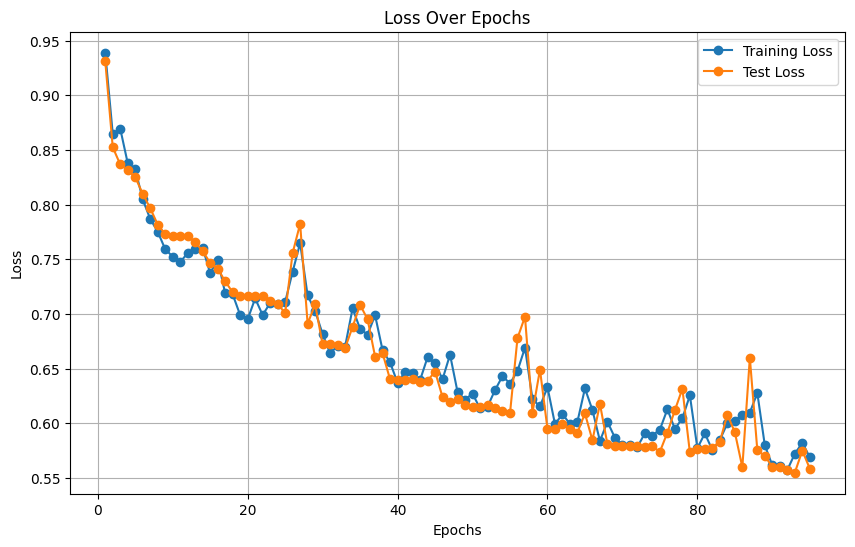

In [3]:

df = pd.read_csv("Performance.csv")
# Number of epochs
num_epochs = len(loss_train[5:])

# Create a list of epoch numbers
epochs = list(range(1, num_epochs + 1))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_train[5:], label='Training Loss', marker='o')
plt.plot(epochs, loss_test[5:], label='Test Loss', marker='o')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


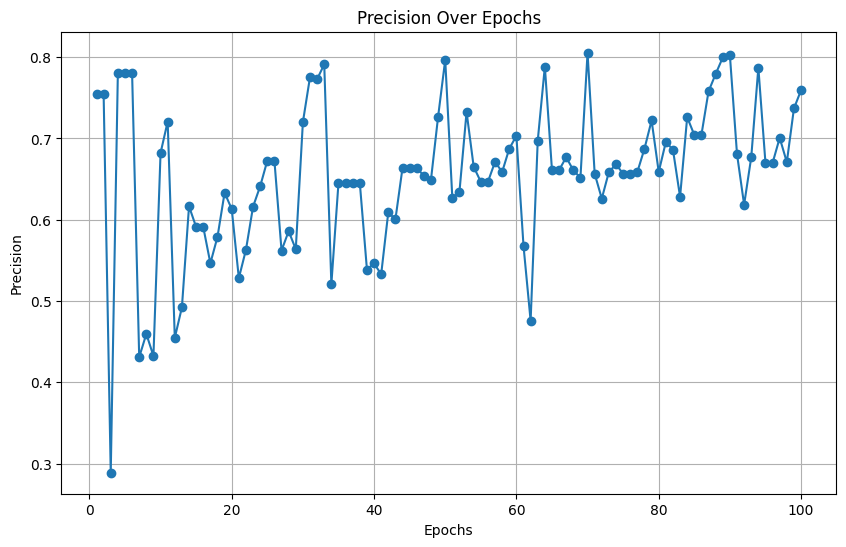

In [4]:
num_epochs = len(loss_train)

# Create a list of epoch numbers
epochs = list(range(1, num_epochs + 1))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, precision, label='Precision Test', marker='o')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision Over Epochs')

# Show the plot
plt.grid(True)
plt.show()


# CONFUSION MATRIX

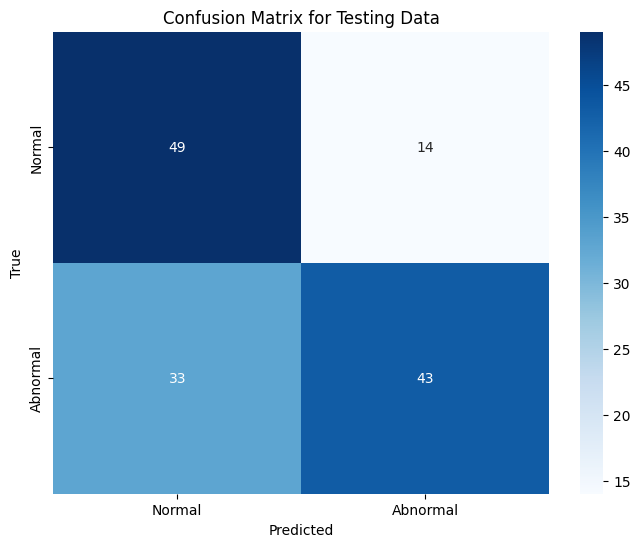

In [3]:
loaded_model = BinaryClassifier().to(DEVICE)
# Load the saved model
loaded_model = torch.load('model\weight')

# Set the model to evaluation mode
loaded_model.eval()

# Create lists to store true and predicted labels
true_labels_test = []
predicted_labels_test = []

# Evaluate the test data using the loaded model
with torch.no_grad():
    for inputs, labels in TESTLOADER:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE).long()
        outputs = loaded_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels_test.extend(labels.tolist())
        predicted_labels_test.extend(predicted.tolist())

# Calculate the confusion matrix
confusion_matrix_test = confusion_matrix(true_labels_test, predicted_labels_test)

# Define class labels if available
class_labels = ["Normal", "Abnormal"]  # Replace with your actual class labels

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Testing Data")
plt.show()

# Checking Gradient

<Figure size 1200x600 with 0 Axes>

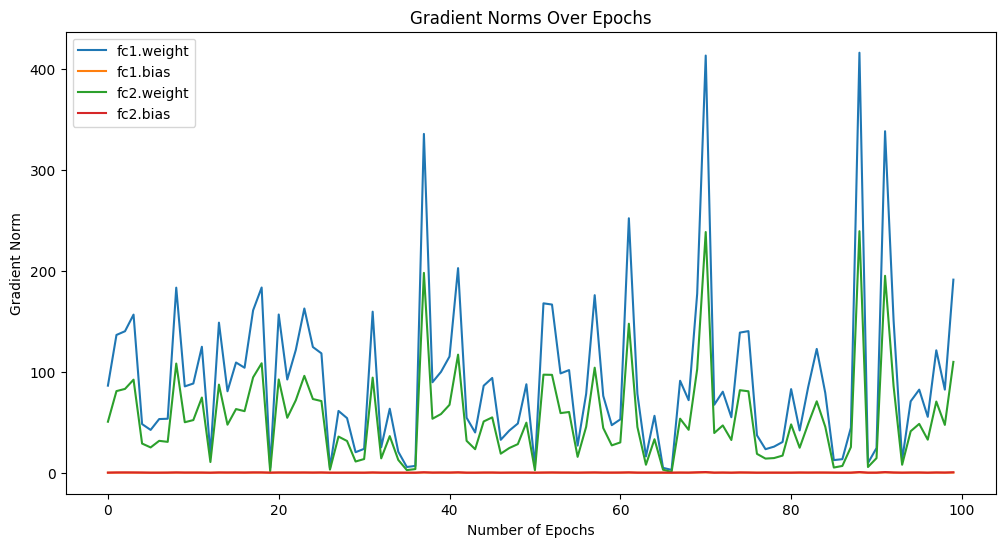

In [ ]:
plt.figure(figsize=(12, 6))
data = pd.read_csv('EpochGradientNorms.csv')

# Plot the data
plt.figure(figsize=(12, 6))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)

plt.xlabel('Number of Epochs')
plt.ylabel('Gradient Norm')
plt.legend(loc ='upper left')
plt.title('Gradient Norms Over Epochs')
plt.show()
